<a href="https://colab.research.google.com/github/jittinabraham/leaflet-product-classification/blob/main/leaflet%20product%20classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
   !pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=86e9b8d6cfc413f4958b3a6e24c7604c1c277a9659e62e0eca585a0b362d48cf
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!wget https://zenodo.org/record/7869954/files/products_leaflets_256.zip

--2023-11-18 11:38:17--  https://zenodo.org/record/7869954/files/products_leaflets_256.zip
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7869954/files/products_leaflets_256.zip [following]
--2023-11-18 11:38:17--  https://zenodo.org/records/7869954/files/products_leaflets_256.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1171218652 (1.1G) [application/octet-stream]
Saving to: ‘products_leaflets_256.zip’

products_leaflets_2 100%[===================>]   1.09G  86.4MB/s    in 8.5s    

2023-11-18 11:38:26 (131 MB/s) - ‘products_leaflets_256.zip’ saved [1171218652/1171218652]



In [3]:
!unzip products_leaflets_256.zip


Streaming output truncated to the last 5000 lines.
  inflating: products_leaflets_256/train/738/39037.jpg  
  inflating: products_leaflets_256/train/738/39038.jpg  
  inflating: products_leaflets_256/train/738/39040.jpg  
  inflating: products_leaflets_256/train/738/39041.jpg  
  inflating: products_leaflets_256/train/738/39042.jpg  
  inflating: products_leaflets_256/train/738/39043.jpg  
  inflating: products_leaflets_256/train/738/39050.jpg  
  inflating: products_leaflets_256/train/738/39051.jpg  
  inflating: products_leaflets_256/train/738/39052.jpg  
  inflating: products_leaflets_256/train/738/39053.jpg  
  inflating: products_leaflets_256/train/738/39054.jpg  
  inflating: products_leaflets_256/train/738/39055.jpg  
  inflating: products_leaflets_256/train/738/39056.jpg  
  inflating: products_leaflets_256/train/738/39057.jpg  
  inflating: products_leaflets_256/train/738/39058.jpg  
  inflating: products_leaflets_256/train/738/39059.jpg  
  inflating: products_leaflets_256/tr

In [1]:
from tensorflow.keras.layers import Input
import tensorflow as tf
from keras.models import Sequential
import keras
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#import cv2
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from tensorflow.compat.v1.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator


%matplotlib inline


In [2]:
import os

# Specify the path to the folder containing subfolders
folder_path = "/content/products_leaflets_256/train"

# Use os.walk to traverse the folder and its subdirectories
for root, _, files in os.walk(folder_path):
    # Count the number of files in the current subfolder
    num_files = len(files)
    print(f"Subfolder: {root}, Number of Files: {num_files}")


Subfolder: /content/products_leaflets_256/train, Number of Files: 0
Subfolder: /content/products_leaflets_256/train/237, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/801, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/10, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/717, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/217, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/782, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/706, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/41, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/482, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/128, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/34, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/238, Number of Files: 40
Subfolder: /content/products_leaflets_256/train/53, Number 

In [3]:
import os
from PIL import Image
import numpy as np

# Set the paths to your data folders
data_folder = '/content/products_leaflets_256/train'
batch1_folders = range(0, 377)  # Folders from 0 to 400
batch2_folders = range(401, 832)  # Folders from 401 to 831

# Function to load images from a list of folders
def load_images_from_folders(folders):
    x_train = []
    y_label = []

    for folder in folders:
        folder_path = os.path.join(data_folder, str(folder))
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            img = img.resize((desired_width, desired_height))  # Resize if needed
            x_train.append(np.array(img))
            y_label.append(folder)

    return np.array(x_train), np.array(y_label)

# Define the desired dimensions for your images


In [4]:
desired_width = 256
desired_height = 256
x_train_batch1, y_label_batch1 = load_images_from_folders(batch1_folders)












In [5]:
import numpy as np


# Determine the number of samples
num_samples = x_train_batch1.shape[0]

# Generate random shuffled indices
shuffled_indices = np.arange(num_samples)
np.random.shuffle(shuffled_indices)
x_train=x_train_batch1[shuffled_indices]
y_label=y_label_batch1[shuffled_indices]

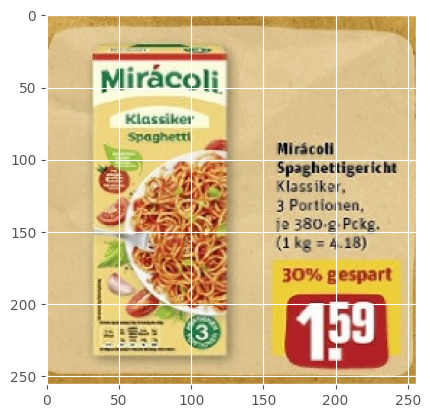

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy array


# Choose an index to display (for example, the first image)
image_index = 0

# Display the image
plt.imshow(x_train[0])  # 'gray' is for grayscale images
plt.show()


In [7]:
print(y_label[0])

96


In [8]:




# Split the data into training and validation sets
train_split = 0.8
num_samples = len(x_train)  # Assuming x_train is your data

num_train_samples = int(train_split * num_samples)

x_train_split = x_train[:num_train_samples]
y_label_split = y_label[:num_train_samples]

x_validation = x_train[num_train_samples:]
y_validation = y_label[num_train_samples:]



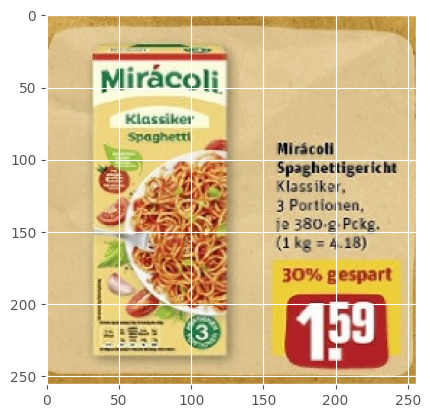

96


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy array


# Choose an index to display (for example, the first image)
image_index = 0

# Display the image
plt.imshow(x_train_split[0])  # 'gray' is for grayscale images
plt.show()
print(y_label_split[0])


In [10]:
del x_train
del y_label
del x_train_batch1
del y_label_batch1

In [11]:
from tensorflow.keras.utils import to_categorical
# Number of classes (401 in your case)
num_classes = 378

# Subtract one from the class labels to account for the shift
y_label_shifted = y_label_split - 1
y_validation_shifted = y_validation - 1

# One-hot encode the shifted labels
y_label_encoded = to_categorical(y_label_shifted, num_classes)
y_label_encoded_validation = to_categorical(y_validation_shifted, num_classes)


In [12]:
del y_validation
del y_label_split
del y_label_shifted
del y_validation_shifted

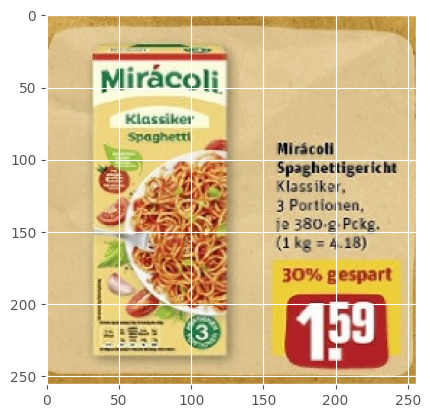

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy array


# Choose an index to display (for example, the first image)
image_index = 0

# Display the image
plt.imshow(x_train_split[0])  # 'gray' is for grayscale images
plt.show()
print(y_label_encoded[0])

In [14]:
conv_base = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(256, 256, 3),
    include_top=False  # Do not include the ImageNet classifier at the top.
)

# Print structure in console
conv_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0

In [15]:

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(layers.Dense(378, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 average_pooling2d (Average  (None, 4, 4, 1280)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 100)               2048100   
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 average_pooling2d (Average  (None, 4, 4, 1280)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 100)               2048100   
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x_train_split, y_label_encoded, validation_data=(x_validation, y_label_encoded_validation), epochs=30, batch_size=32)

Epoch 1/30
377/377 [==============================] - 191s 369ms/step - loss: 4.6372 - accuracy: 0.1502 - val_loss: 2.5123 - val_accuracy: 0.4658
Epoch 2/30
377/377 [==============================] - 139s 368ms/step - loss: 1.7406 - accuracy: 0.5803 - val_loss: 0.9095 - val_accuracy: 0.7772
Epoch 3/30
377/377 [==============================] - 138s 367ms/step - loss: 0.8214 - accuracy: 0.7832 - val_loss: 0.6616 - val_accuracy: 0.8382
Epoch 4/30
377/377 [==============================] - 139s 368ms/step - loss: 0.5269 - accuracy: 0.8546 - val_loss: 0.4347 - val_accuracy: 0.8959
Epoch 5/30
377/377 [==============================] - 139s 368ms/step - loss: 0.3745 - accuracy: 0.8964 - val_loss: 0.4100 - val_accuracy: 0.9042
Epoch 6/30
377/377 [==============================] - 139s 367ms/step - loss: 0.4051 - accuracy: 0.8984 - val_loss: 0.3097 - val_accuracy: 0.9227
Epoch 7/30
377/377 [==============================] - 136s 360ms/step - loss: 0.3451 - accuracy: 0.9039 - val_loss: 0.3902 -